In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
import os
import wrangle
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

In [2]:
white = pd.read_csv('white_wine.csv')
white_wines = 'White Wine'
white['Wine_Color'] = white_wines
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  Wine_Color            4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [3]:
red = pd.read_csv('red_wine.csv')
red_wines = 'Red Wine'
red['Wine_Color'] = red_wines
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  Wine_Color            1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [4]:
frames = [white, red]

In [5]:
wines = pd.concat(frames)
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Wine_Color            6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [6]:
wines = wines.rename(columns=({'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}))
wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White Wine
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White Wine
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White Wine
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White Wine
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White Wine


In [7]:
wines.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color
2642,7.6,0.230,0.40,5.2,0.066,14.0,91.0,0.99488,3.17,0.80,9.7,5,White Wine
676,10.8,0.400,0.41,2.2,0.084,7.0,17.0,0.99840,3.08,0.67,9.3,6,Red Wine
1723,6.5,0.180,0.34,1.6,0.040,43.0,148.0,0.99120,3.32,0.59,11.5,8,White Wine
991,7.1,0.340,0.28,2.0,0.082,31.0,68.0,0.99694,3.45,0.48,9.4,5,Red Wine
4172,6.8,0.340,0.27,5.2,0.060,14.0,169.0,0.99252,3.27,0.57,11.6,6,White Wine
2387,6.9,0.300,0.30,1.3,0.053,24.0,186.0,0.99361,3.29,0.54,9.9,4,White Wine
2359,6.0,0.495,0.27,5.0,0.157,17.0,129.0,0.99396,3.03,0.36,9.3,5,White Wine
2046,8.3,0.330,0.43,9.2,0.046,22.0,126.0,0.99820,3.38,0.47,9.3,5,White Wine
3670,6.2,0.210,0.18,11.6,0.044,61.0,155.0,0.99655,3.14,0.52,9.4,6,White Wine
185,6.8,0.290,0.56,11.9,0.043,66.0,230.0,0.99720,3.02,0.63,9.3,5,White Wine


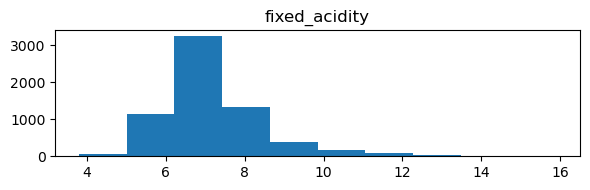

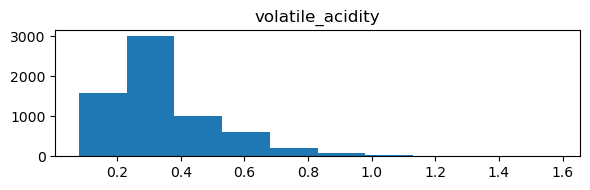

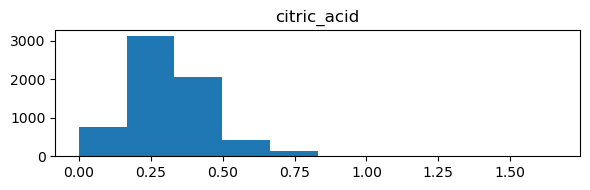

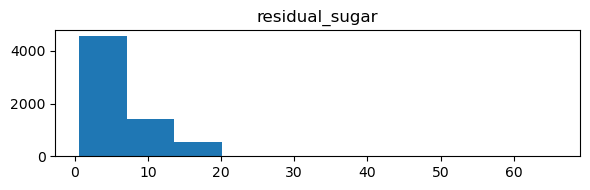

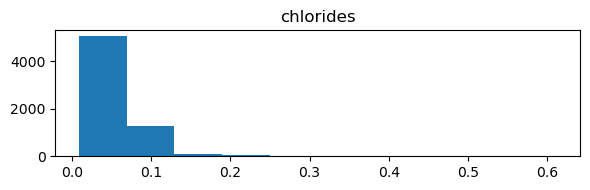

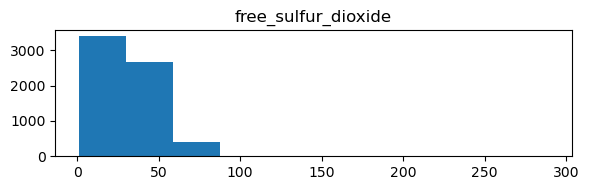

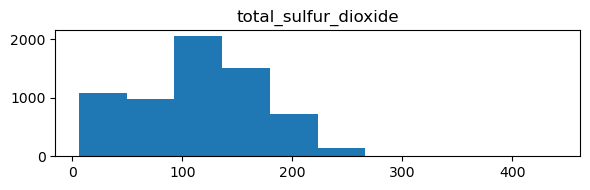

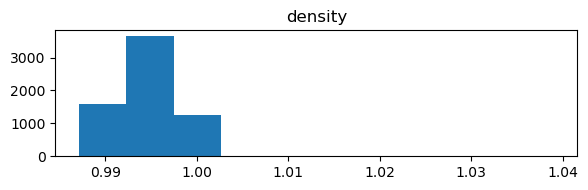

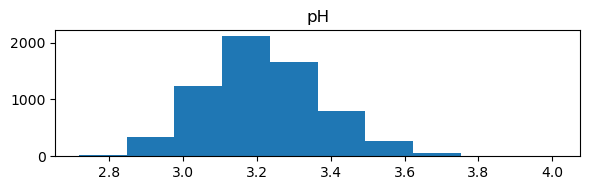

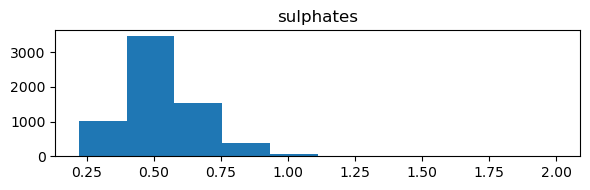

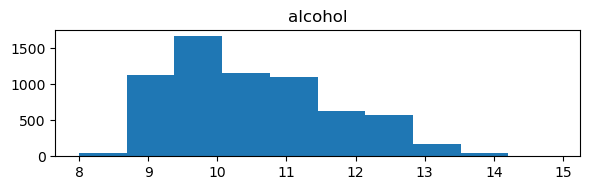

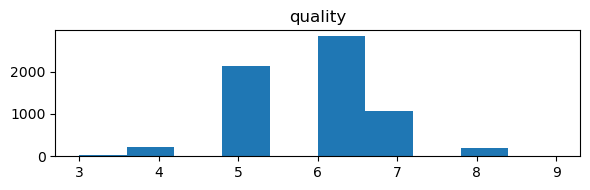

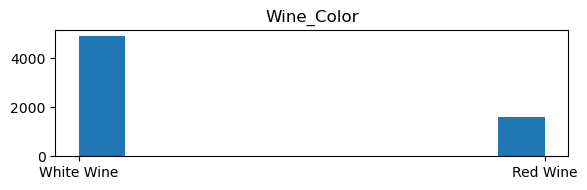

In [8]:
for col in wines:
    plt.figure(figsize = (6,2))
    plt.hist(wines[col])
    plt.title(f'{col}')
    plt.tight_layout();

FIXED_ACIDITY
count of unique: 106


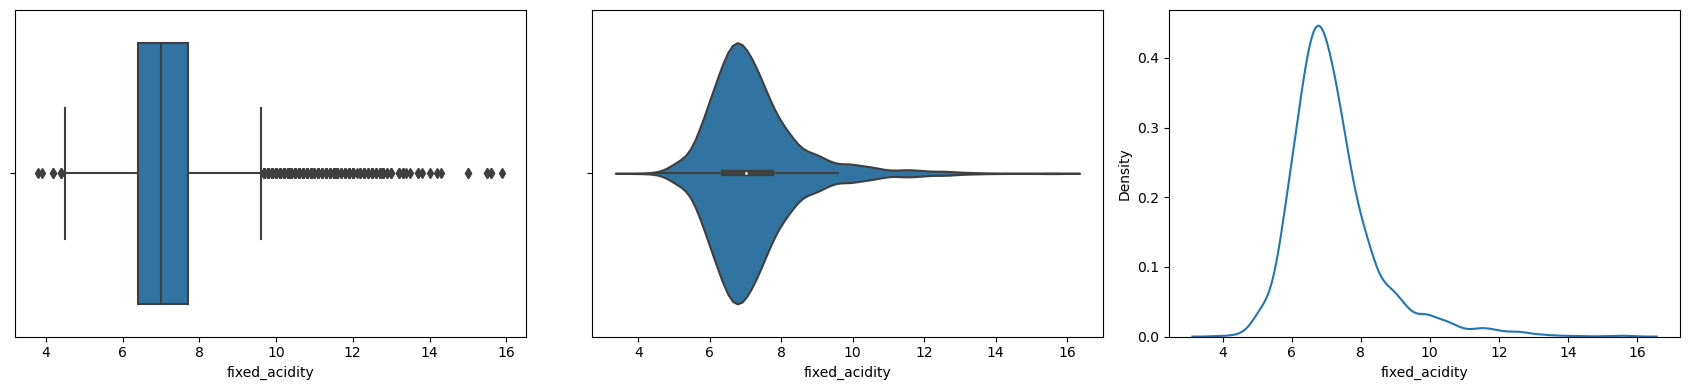

VOLATILE_ACIDITY
count of unique: 187


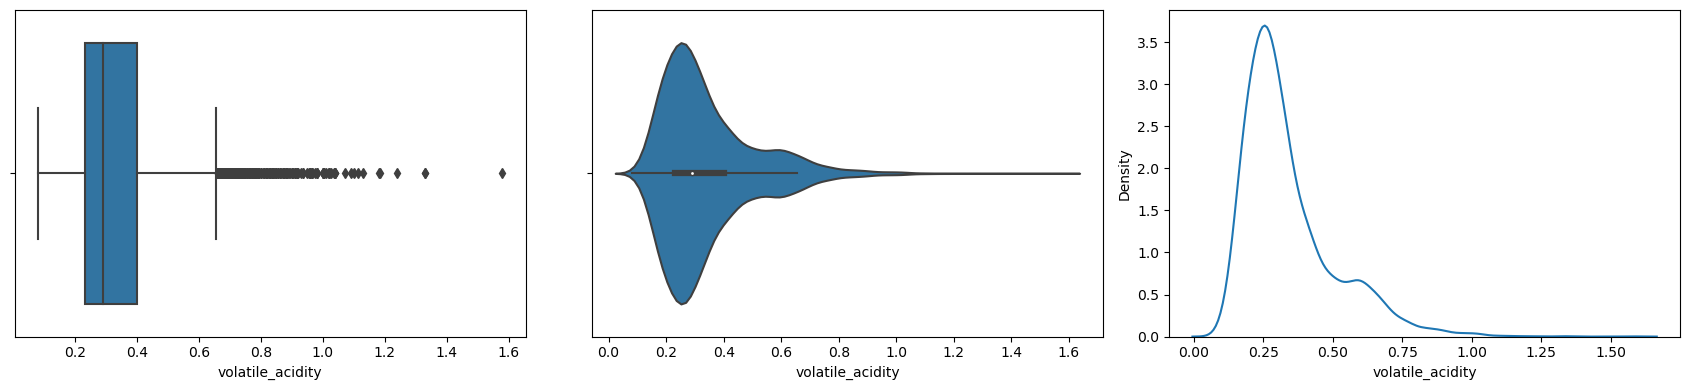

CITRIC_ACID
count of unique: 89


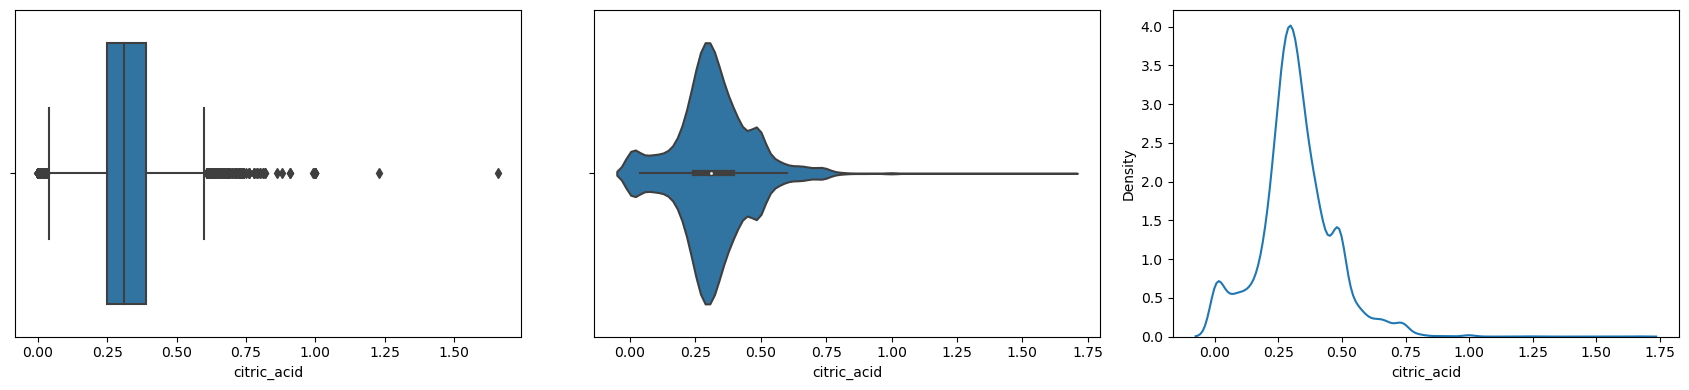

RESIDUAL_SUGAR
count of unique: 316


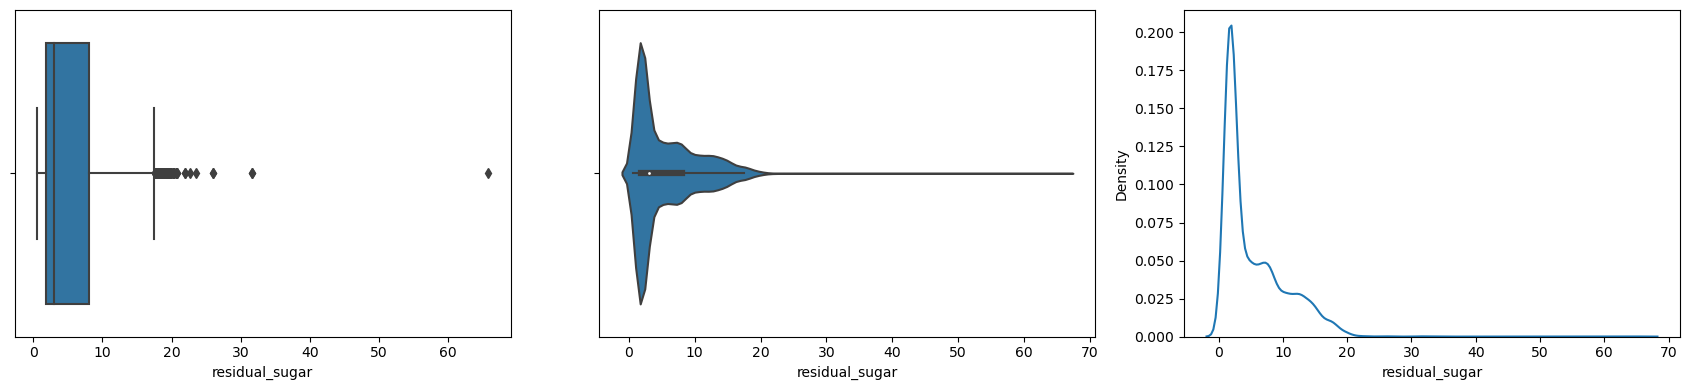

CHLORIDES
count of unique: 214


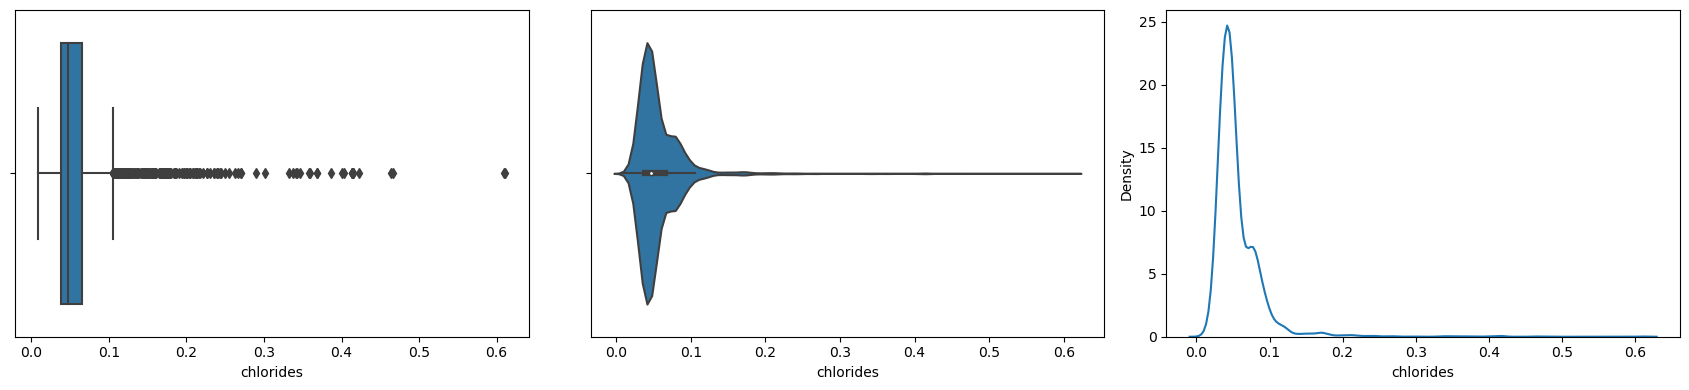

FREE_SULFUR_DIOXIDE
count of unique: 135


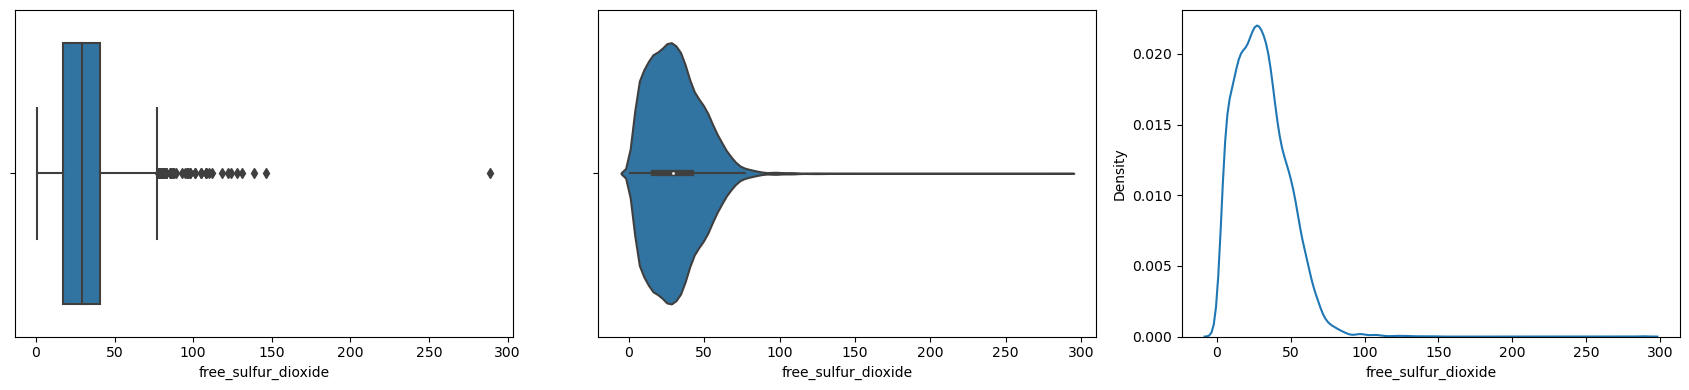

TOTAL_SULFUR_DIOXIDE
count of unique: 276


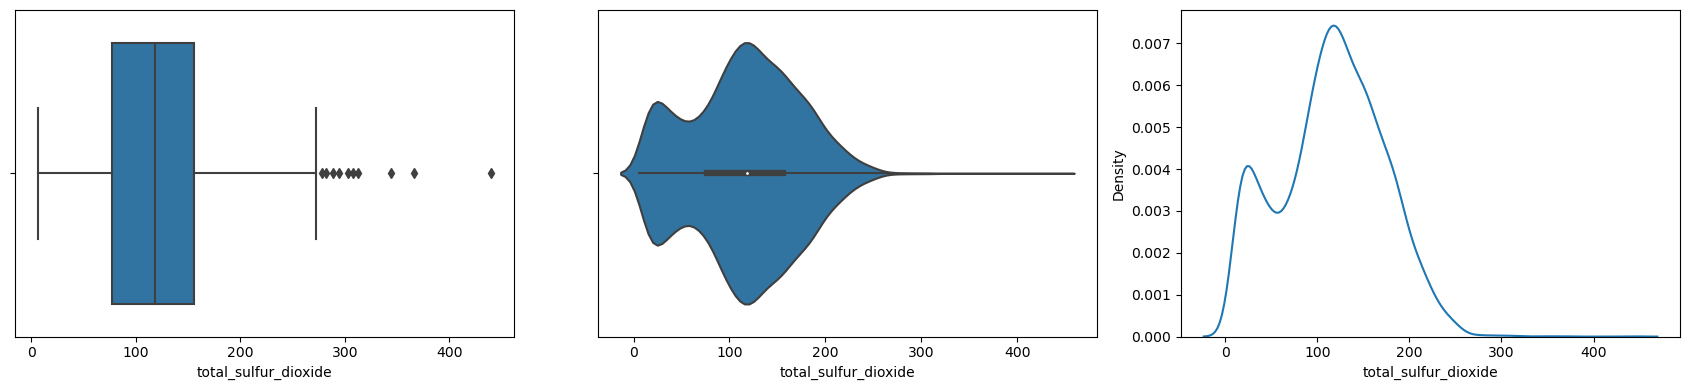

DENSITY
count of unique: 998


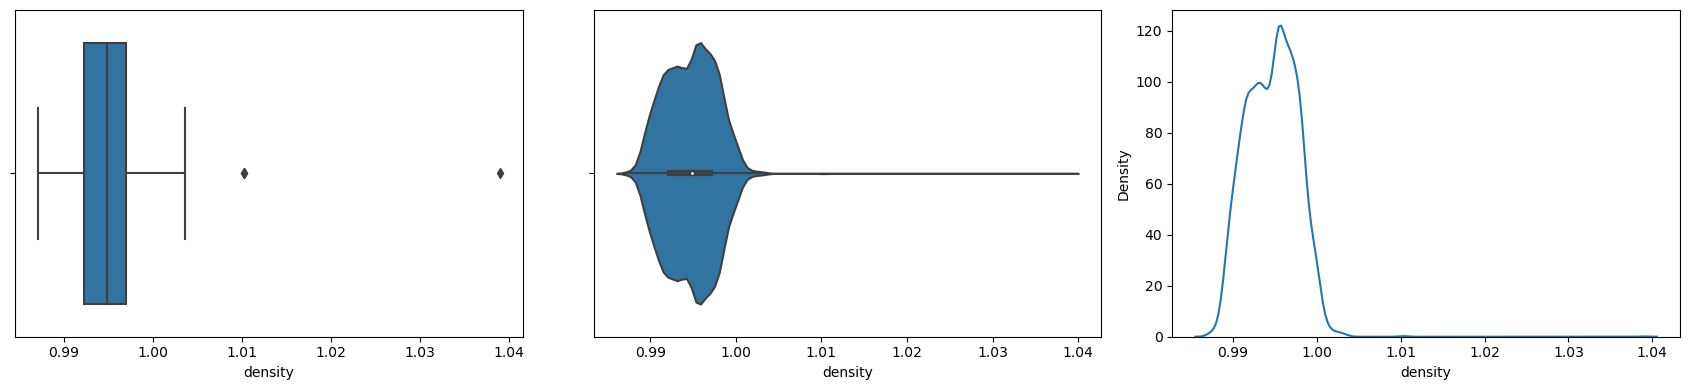

PH
count of unique: 108


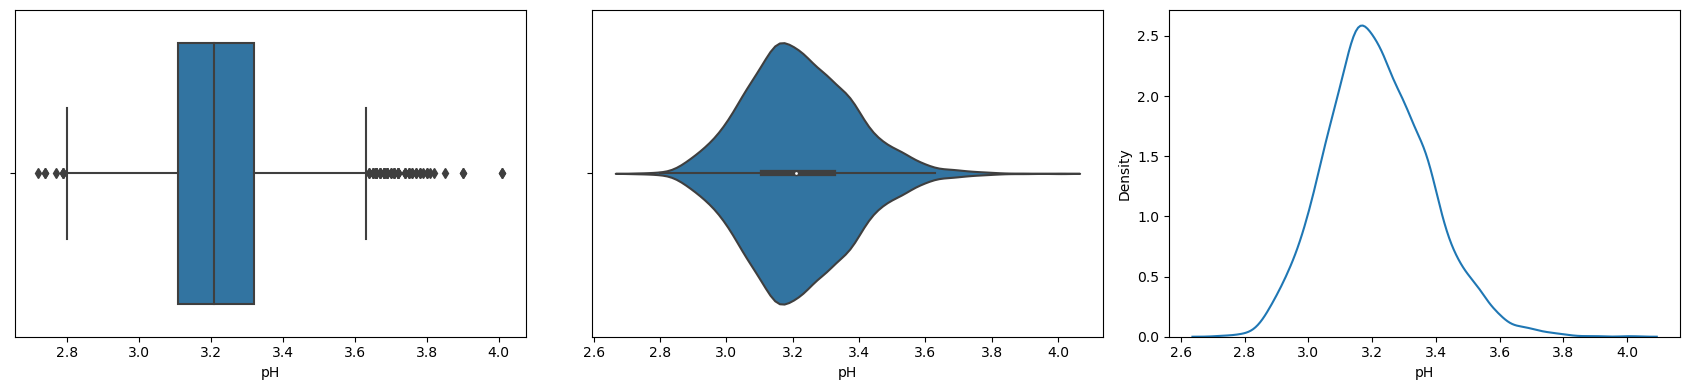

SULPHATES
count of unique: 111


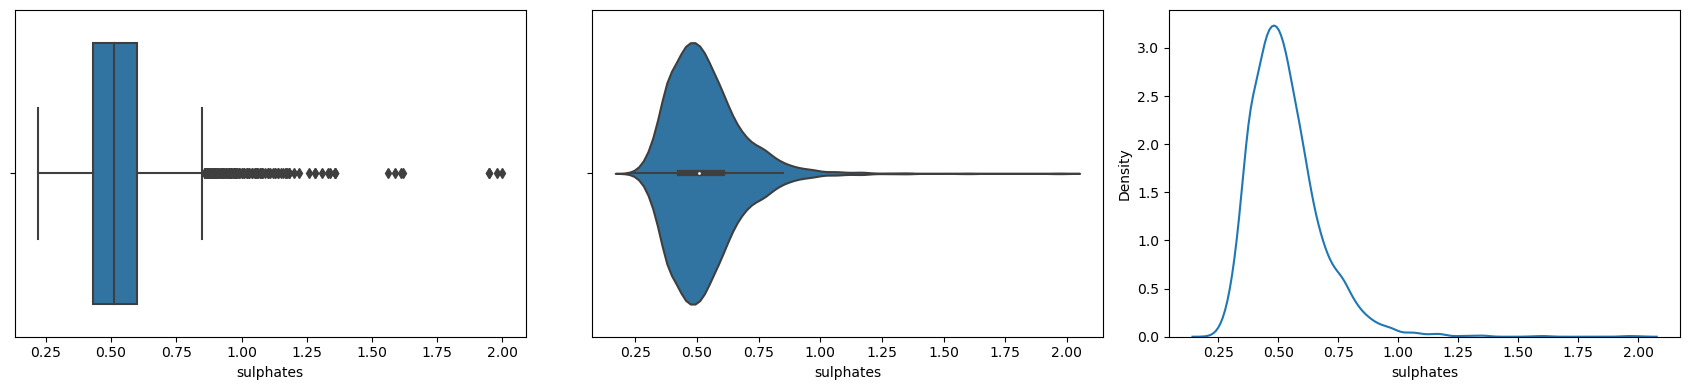

ALCOHOL
count of unique: 111


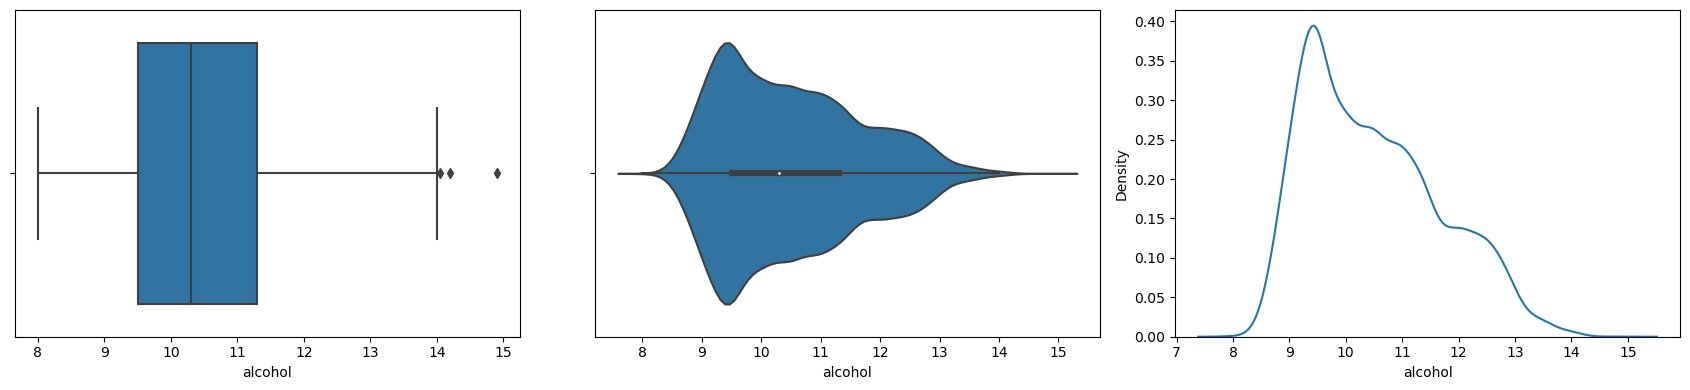

QUALITY
count of unique: 7


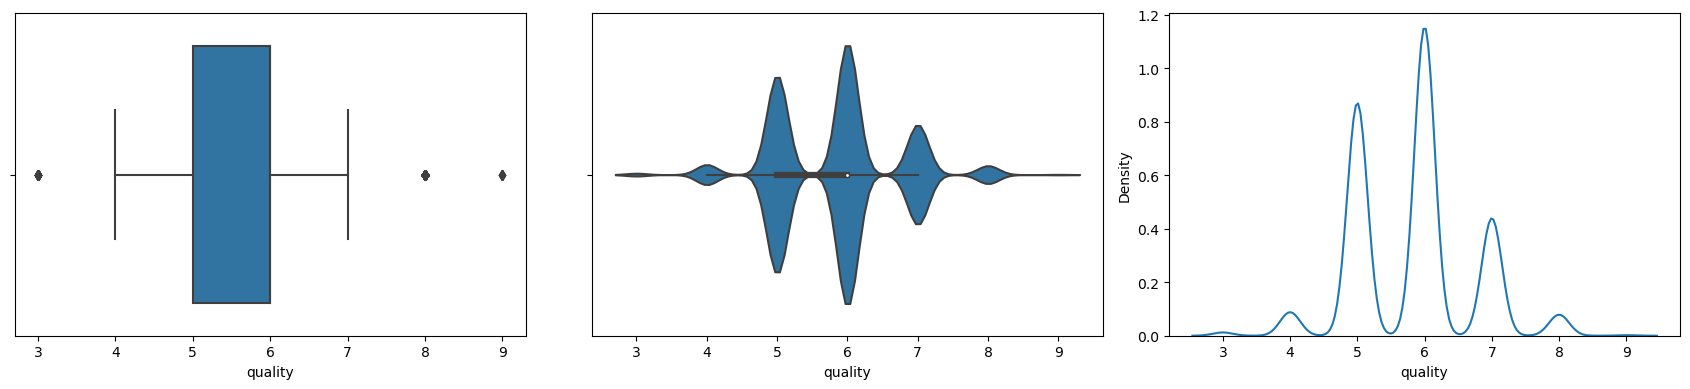

In [9]:
winey = wines.drop(columns='Wine_Color')
for col in winey:
    print(col.upper())
    print("count of unique:",wines[col].nunique())
    # plot
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,4))
    sns.boxplot(data= wines, x=col, ax=ax[0])
    sns.violinplot(data= wines, x=col, ax=ax[1])
    sns.kdeplot(wines, x=col, ax=ax[2])
    plt.tight_layout()
    plt.show()

<h3><b>Univariate Questions

Are any of the features correlated? Can I apply some sort of feature selection?\
Should I look at the top 'x' best and bottom 'x' worst wines for comparison? Is that a way to gain perspective?\
The range of quality is 0-10. Very few low and top quality wines. A lot of middle-quality wines in the lot.\
Classification or regression? Should I do both for a comparison given the time I have to work on this?\
Are all input variables relevant?\
Initial Hypothesis:
- Low PH and low acidity contributes to higher quality.
- Alcohol has no affect on quality.
- Chlorides and Residual sugar have zero contribution to quality.

In [10]:
from wrangle import split_data
train, validate, test = split_data(wines)
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color
3737,7.1,0.21,0.72,1.6,0.167,65.0,120.0,0.99324,2.97,0.51,9.2,5,White Wine
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5,White Wine
2200,6.4,0.24,0.23,7.3,0.069,31.0,157.0,0.99620,3.25,0.53,9.1,5,White Wine
4139,6.8,0.18,0.35,5.4,0.054,53.0,143.0,0.99287,3.10,0.54,11.0,7,White Wine
501,6.8,0.19,0.58,14.2,0.038,51.0,164.0,0.99750,3.12,0.48,9.6,6,White Wine


In [11]:
train.shape, validate.shape, test.shape

((3637, 13), (1560, 13), (1300, 13))

In [12]:
train_corr = train.corr()
train_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.226774,0.332317,-0.098034,0.297309,-0.290925,-0.337785,0.469931,-0.246691,0.299713,-0.091762,-0.065368
volatile_acidity,0.226774,1.000000,-0.376408,-0.188824,0.364244,-0.364023,-0.419476,0.278780,0.268714,0.239365,-0.034203,-0.269760
citric_acid,0.332317,-0.376408,1.000000,0.164637,0.046777,0.143539,0.198261,0.115682,-0.343603,0.061157,-0.017344,0.088984
residual_sugar,-0.098034,-0.188824,0.164637,1.000000,-0.120803,0.395073,0.490215,0.552325,-0.267587,-0.181494,-0.346102,-0.035653
chlorides,0.297309,0.364244,0.046777,-0.120803,1.000000,-0.188216,-0.271326,0.361243,0.047180,0.400766,-0.248475,-0.203906
free_sulfur_dioxide,-0.290925,-0.364023,0.143539,0.395073,-0.188216,1.000000,0.722103,0.006237,-0.149522,-0.210375,-0.178417,0.062509
total_sulfur_dioxide,-0.337785,-0.419476,0.198261,0.490215,-0.271326,0.722103,1.000000,0.016123,-0.250628,-0.290576,-0.267613,-0.039081
density,0.469931,0.278780,0.115682,0.552325,0.361243,0.006237,0.016123,1.000000,0.020165,0.272256,-0.665954,-0.305751
pH,-0.246691,0.268714,-0.343603,-0.267587,0.047180,-0.149522,-0.250628,0.020165,1.000000,0.201981,0.118596,0.006245
sulphates,0.299713,0.239365,0.061157,-0.181494,0.400766,-0.210375,-0.290576,0.272256,0.201981,1.000000,-0.008089,0.026576


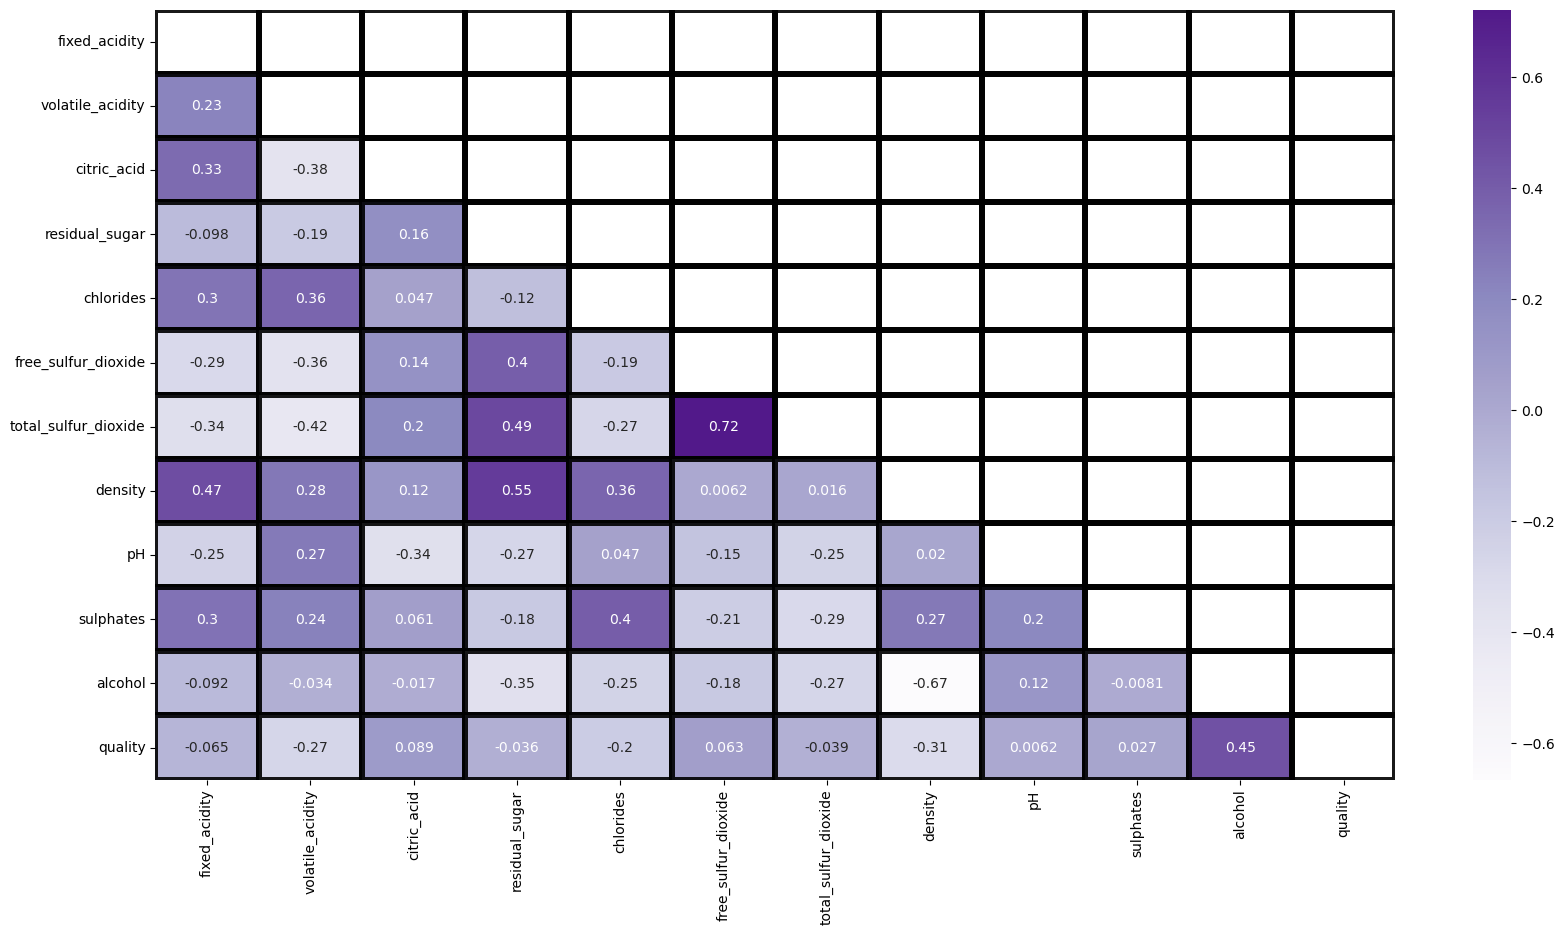

In [13]:
# Pass my correlation matrix to Seaborn's heatmap.
kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}
plt.figure(figsize=(20,10))
sns.heatmap(train_corr, cmap='Purples', annot=True, mask= np.triu(train_corr), **kwargs)
#plt.ylim(10, 10)

plt.show()

<b>HeatMap Takeaways:

 ><b> Biggest Correlation\
    - alcohol (0.45)
    

 ><b> Mid Correlations\
    - citric_acid (0.089)\
    - free_sulfur_dioxide (0.063)\
    - sulphates (0.27)\
    - ph (0.0062)
    

 ><b> Lowest Correlations\
    - residual_sugar (-0.036)\
    - total_sulfur_dioxide (-0.039)\
    - fixed_acidity (-0.065)\
    - chlorides (-0.2)\
    - volatile_acidity (-0.27)\
    - Density (-0.31)

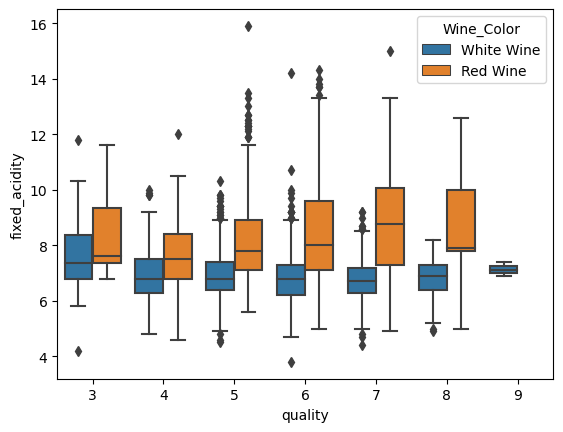

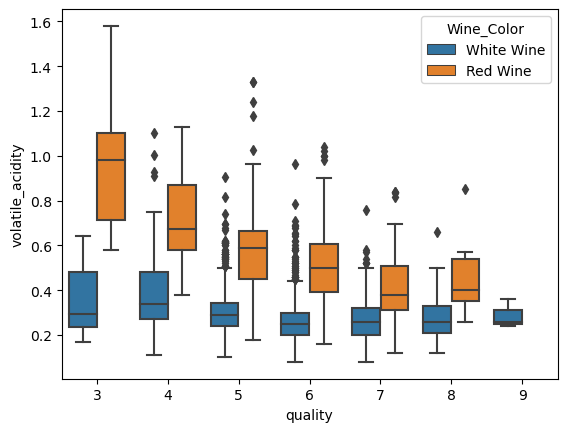

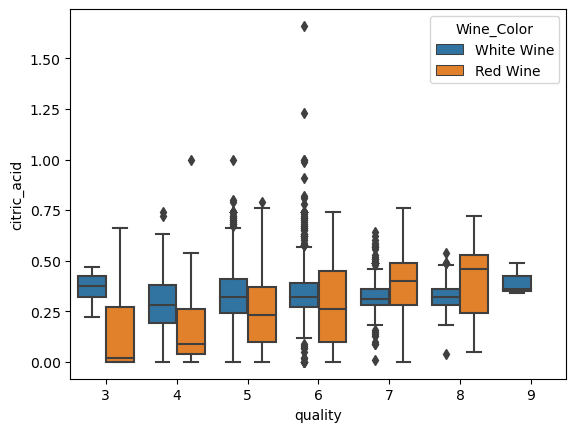

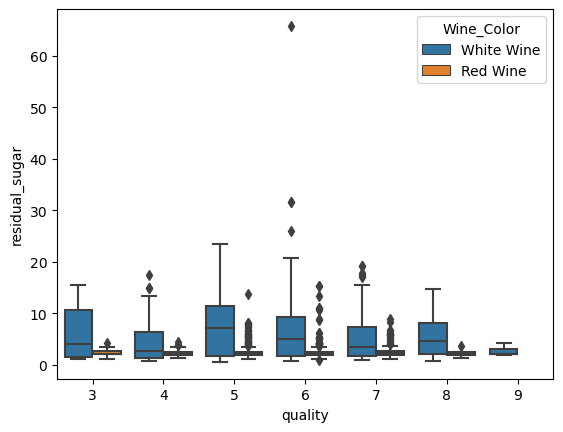

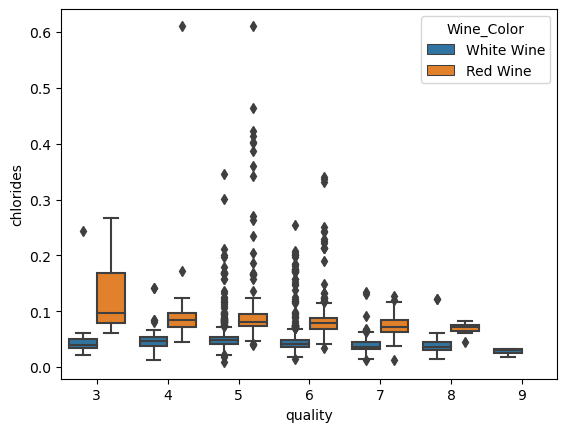

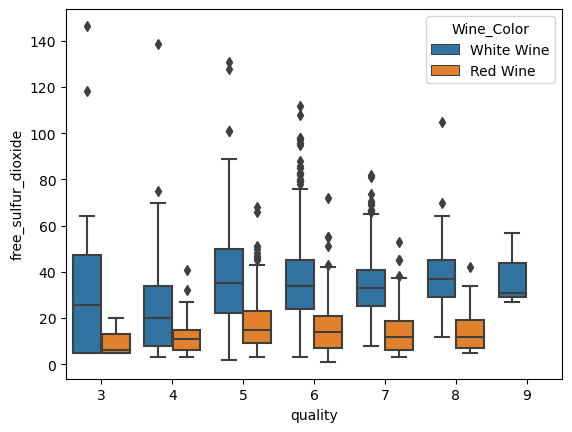

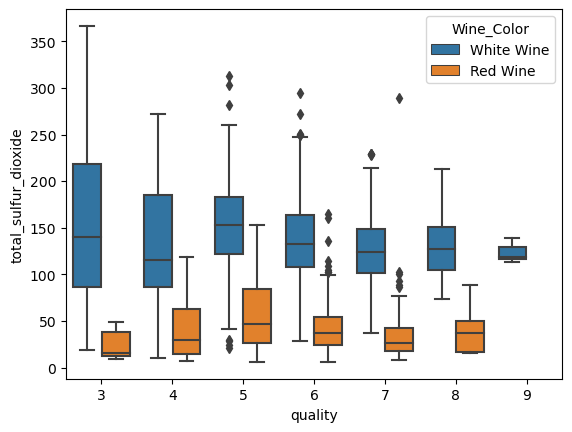

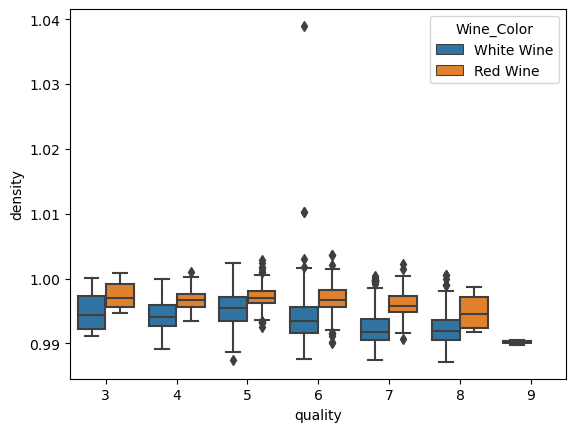

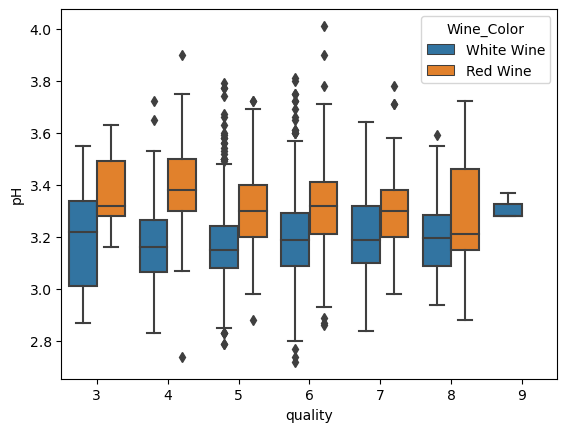

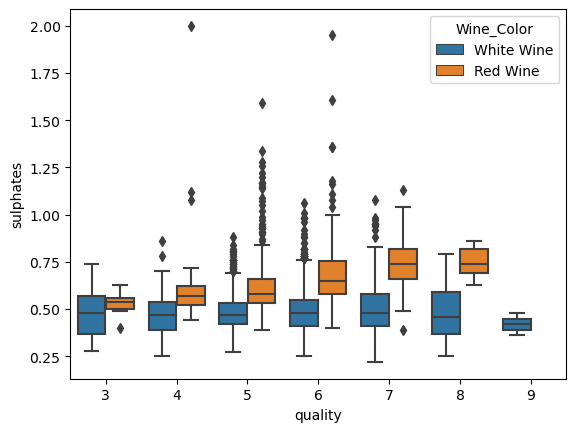

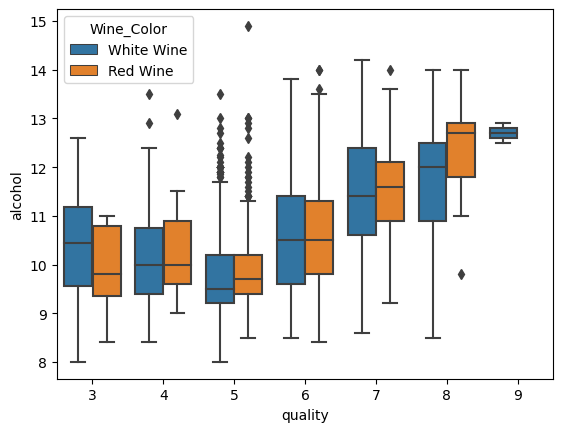

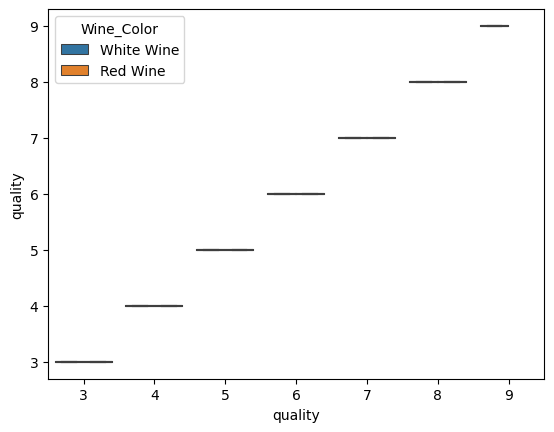

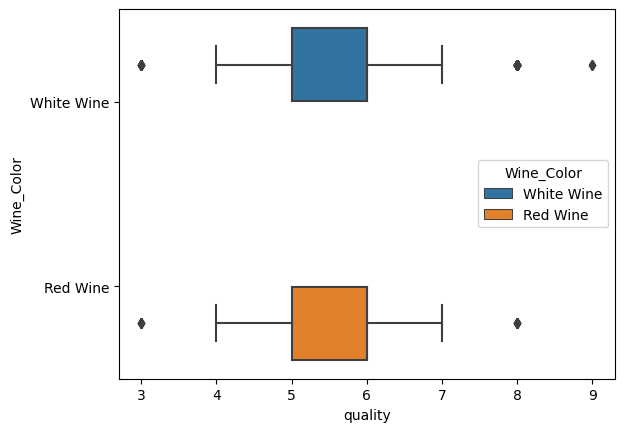

In [14]:
for col in train:
    sns.boxplot(data = train, y = col, x = train.quality, hue='Wine_Color')
    plt.show()

In [15]:
train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Wine_Color'],
      dtype='object')

In [16]:
big_players = train[['alcohol', 'citric_acid', 'free_sulfur_dioxide', 'sulphates', 'pH', 'quality']]

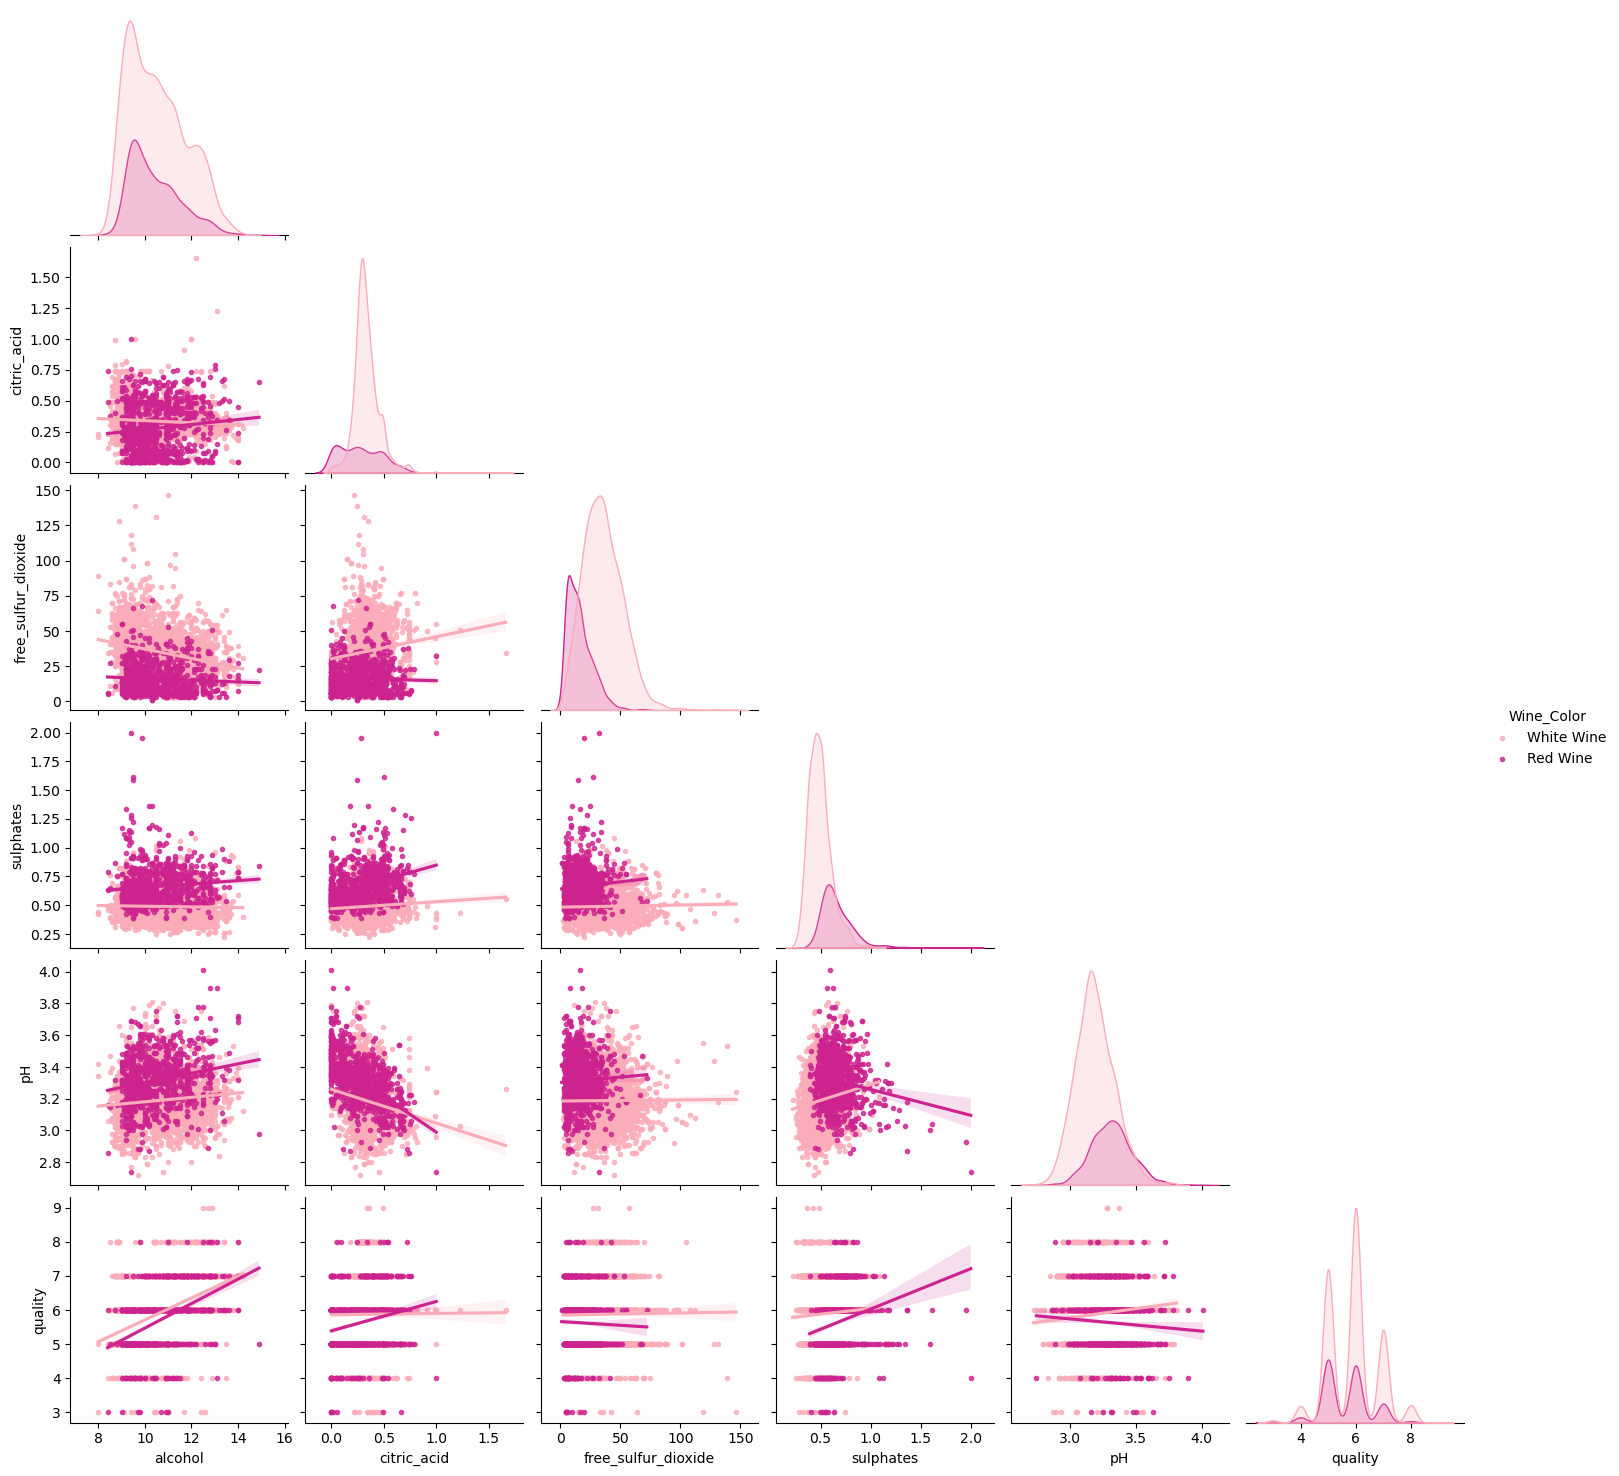

In [17]:
sns.pairplot(data = train, vars=big_players, hue = 'Wine_Color', markers='.', corner=True, kind='reg', palette='RdPu')
plt.show()

> <h3><b> Multivariate Analysis Takeaways

- 'alcohol', 'citric_acid', 'free_sulfur_dioxide', 'sulphates', and 'pH' all have a mid to high correlation with 'quality' (alcohol is the highest by far) per the heatmap.
- The bar chart shows that lower levels of volatile acidity is found in higher quality 'red' and 'white' wines, although more noticeably in the former.
- The bar chart shows that higher levels of sulfates are found in higher quality 'red' wines

<h2><b>Statistical Testing for Correlation


<div class="alert alert-warning" role="alert">
  <b>Question 1: Is there a relationship between quality and alcohol?
</div>

<Axes: xlabel='quality', ylabel='alcohol'>

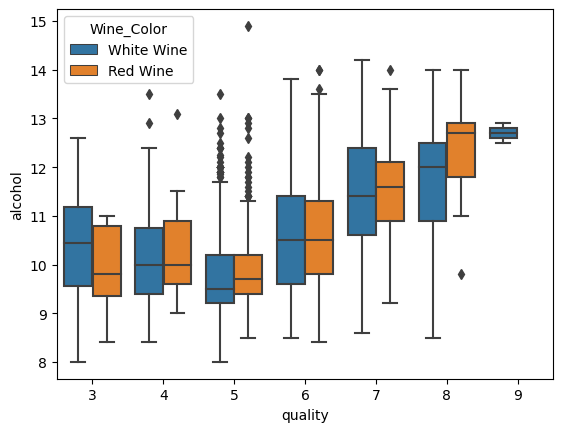

In [18]:
sns.boxplot(data=train, x='quality', y='alcohol', hue='Wine_Color')

In [19]:
relationship_null = 'There is no relationship between "quality" and "alcohol"'
relationship_alternative = 'There IS a relationship between "quality" and "alcohol"'

alpha = 0.05

In [20]:
#stats.levene
stats.levene(train['quality'], train['alcohol'])

LeveneResult(statistic=482.05058196445685, pvalue=1.6626261567358687e-103)

In [21]:
t, p = stats.ttest_ind(train['quality'], train['alcohol'], equal_var=False)
t, p

(-188.83011475353567, 0.0)

In [22]:
if p < alpha:
    print("Reject null hypothesis? ", p < alpha)
    print(f'{relationship_alternative}')

else:
    print("Fail to Reject null hypothesis? ", p > alpha)
    print(f'{relationship_null}')

Reject null hypothesis?  True
There IS a relationship between "quality" and "alcohol"


    
<div class="alert alert-warning" role="alert">
  <b>Question 2: Is there a relationship between quality and free_sulfur_dioxide?
</div>

<Axes: xlabel='free_sulfur_dioxide', ylabel='quality'>

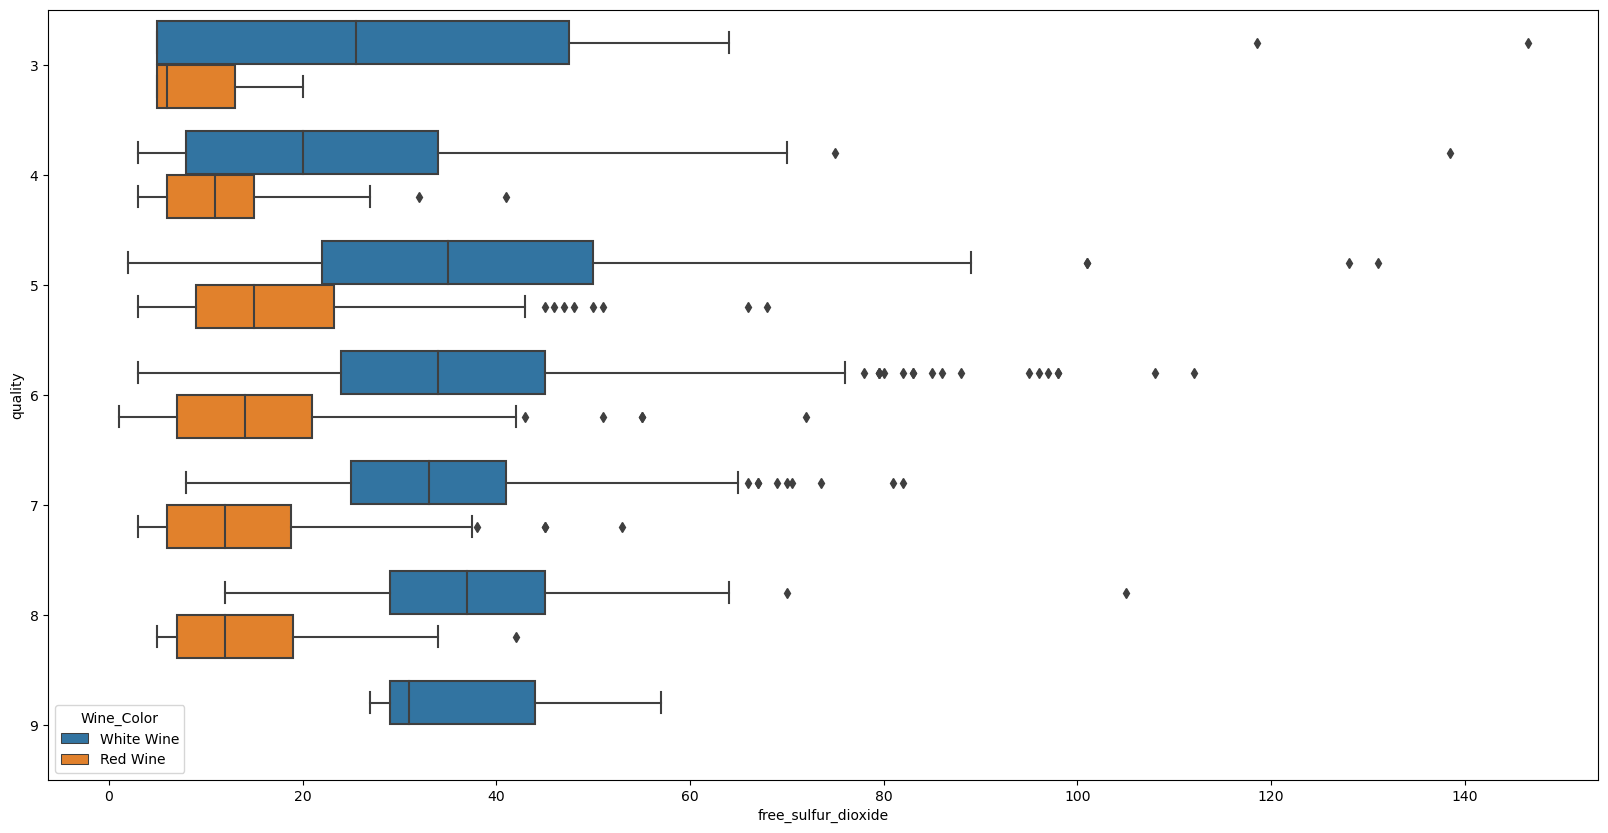

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(data=train, x='free_sulfur_dioxide', y='quality', hue='Wine_Color', orient='h')

In [24]:
relationship_null = 'There is no relationship between "quality" and "free_sulfur_dioxide"'
relationship_alternative = 'There IS a relationship between "quality" and "free_sulfur_dioxide"'

alpha = 0.05

In [25]:
#stats.levene
stats.levene(train['quality'], train['free_sulfur_dioxide'])

LeveneResult(statistic=5479.937134632655, pvalue=0.0)

In [26]:
t, p = stats.ttest_ind(train['quality'], train['free_sulfur_dioxide'], equal_var=False)
t, p

(-84.65799104537766, 0.0)

In [27]:
if p < alpha:
    print("Reject null hypothesis? ", p < alpha)
    print(f'{relationship_alternative}')

else:
    print("Fail to Reject null hypothesis? ", p > alpha)
    print(f'{relationship_null}')

Reject null hypothesis?  True
There IS a relationship between "quality" and "free_sulfur_dioxide"


    
<div class="alert alert-warning" role="alert">
    <b>Question 3: Is there a relationship between quality and sulphates?
</div>

<Axes: xlabel='sulphates', ylabel='quality'>

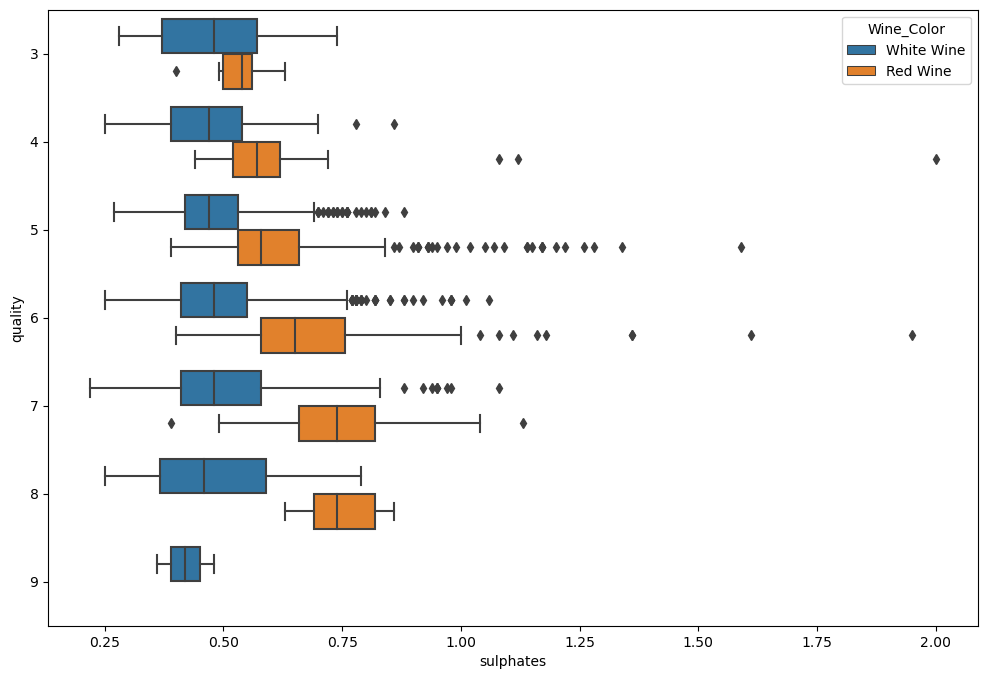

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='sulphates', y='quality', hue='Wine_Color', orient='h')

In [29]:
relationship_null = 'There is no relationship between "quality" and "sulphates"'
relationship_alternative = 'There IS a relationship between "quality" and "sulphates"'

alpha = 0.05

In [30]:
#stats.levene
stats.levene(train['quality'], train['sulphates'])

LeveneResult(statistic=2714.025556143649, pvalue=0.0)

In [31]:
t, p = stats.ttest_ind(train['quality'], train['sulphates'], equal_var=False)
t, p

(355.1655807633573, 0.0)

In [32]:
if p < alpha:
    print("Reject null hypothesis? ", p < alpha)
    print(f'{relationship_alternative}')

else:
    print("Fail to Reject null hypothesis? ", p > alpha)
    print(f'{relationship_null}')

Reject null hypothesis?  True
There IS a relationship between "quality" and "sulphates"



    
<div class="alert alert-warning" role="alert">
    <b>Question 4: Is there a relationship between quality and pH?
</div>

<Axes: xlabel='pH', ylabel='quality'>

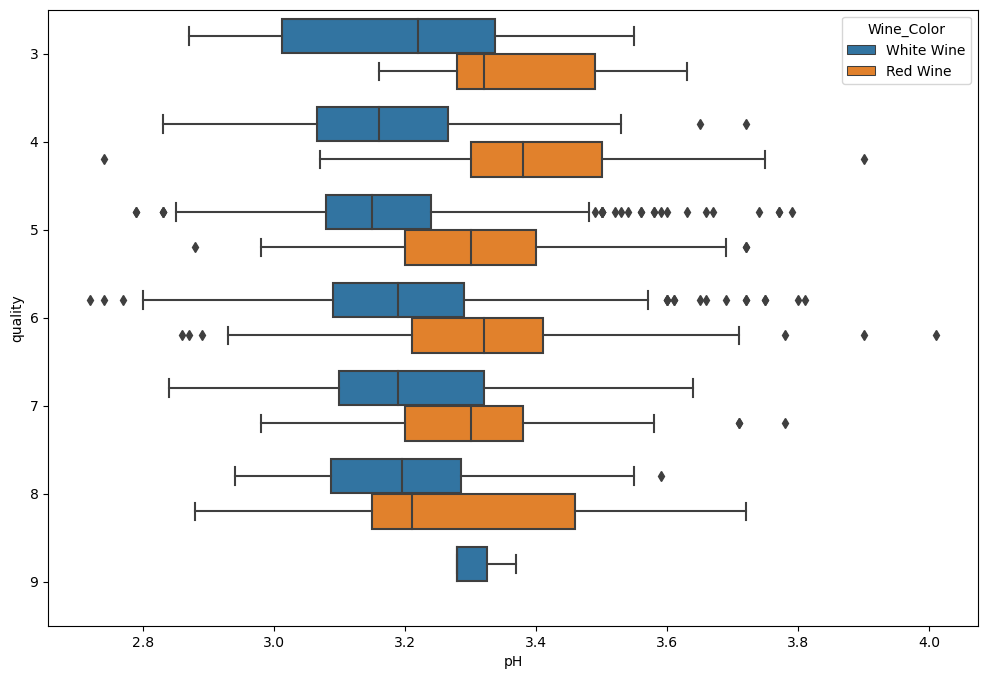

In [33]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='pH', y='quality', hue='Wine_Color', orient='h')

In [34]:
relationship_null = 'There is no relationship between "quality" and "pH"'
relationship_alternative = 'There IS a relationship between "quality" and "pH"'

alpha = 0.05

In [35]:
#stats.levene
stats.levene(train['quality'], train['pH'])

LeveneResult(statistic=2534.0080196855356, pvalue=0.0)

In [36]:
t, p = stats.ttest_ind(train['quality'], train['pH'], equal_var=False)
t, p

(173.95770286817077, 0.0)

In [37]:
if p < alpha:
    print("Reject null hypothesis? ", p < alpha)
    print(f'{relationship_alternative}')

else:
    print("Fail to Reject null hypothesis? ", p > alpha)
    print(f'{relationship_null}')

Reject null hypothesis?  True
There IS a relationship between "quality" and "pH"



    
<div class="alert alert-warning" role="alert">
    <b>Question 5: Is there a relationship between quality and citric_acid?
</div>

<Axes: xlabel='citric_acid', ylabel='quality'>

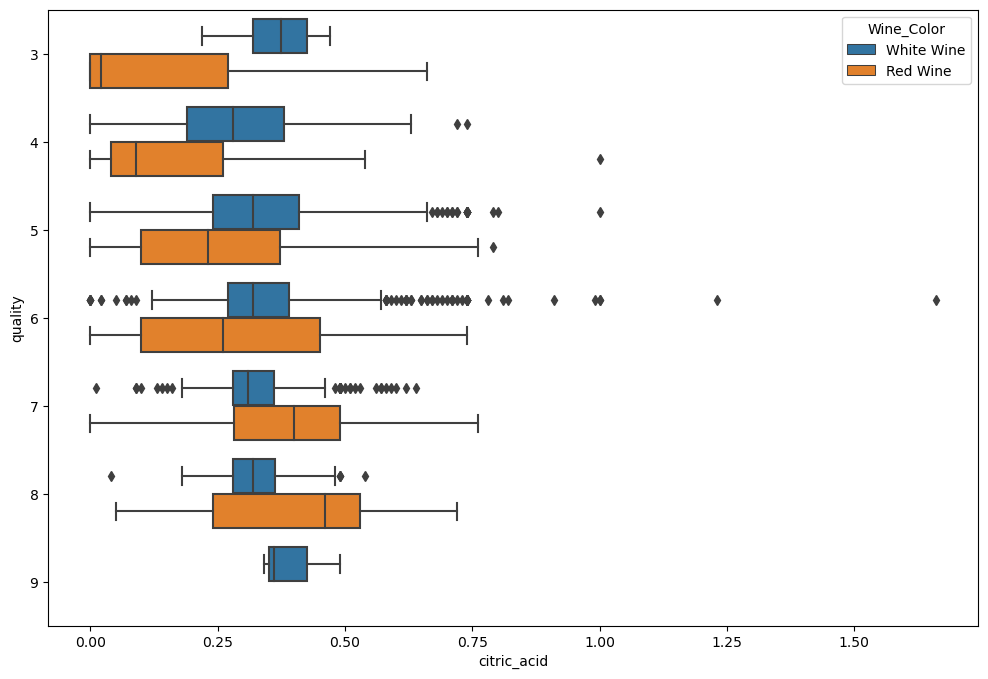

In [38]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='citric_acid', y='quality', hue='Wine_Color', orient='h')

In [39]:
relationship_null = 'There is no relationship between "quality" and "citric_acid"'
relationship_alternative = 'There IS a relationship between "quality" and "citric_acid"'

alpha = 0.05

In [40]:
#stats.levene
stats.levene(train['quality'], train['citric_acid'])

LeveneResult(statistic=2726.802700009096, pvalue=0.0)

In [41]:
t, p = stats.ttest_ind(train['quality'], train['citric_acid'], equal_var=False)
t, p

(369.59366802357266, 0.0)

In [42]:
if p < alpha:
    print("Reject null hypothesis? ", p < alpha)
    print(f'{relationship_alternative}')

else:
    print("Fail to Reject null hypothesis? ", p > alpha)
    print(f'{relationship_null}')

Reject null hypothesis?  True
There IS a relationship between "quality" and "citric_acid"


<h2><b>Modeling

<h4><b>Let's look at 'citric_acid' & 'pH'

In [43]:
X = train[['citric_acid', 'pH']]

# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)

array([2, 0, 0, ..., 1, 0, 1], dtype=int32)

> <b>Add Clusters to original train data:

In [44]:
# make a new column names cluster in wines and X dataframe

train['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color,cluster
3737,7.1,0.21,0.72,1.6,0.167,65.0,120.0,0.99324,2.97,0.51,9.2,5,White Wine,2
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5,White Wine,0
2200,6.4,0.24,0.23,7.3,0.069,31.0,157.0,0.99620,3.25,0.53,9.1,5,White Wine,0
4139,6.8,0.18,0.35,5.4,0.054,53.0,143.0,0.99287,3.10,0.54,11.0,7,White Wine,0
501,6.8,0.19,0.58,14.2,0.038,51.0,164.0,0.99750,3.12,0.48,9.6,6,White Wine,2


In [45]:
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans.cluster_centers_

array([[0.28919285, 3.12168823],
       [0.22859143, 3.39155684],
       [0.519     , 3.1548625 ]])

In [46]:
# Make a dataframe 

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:2])
centroids

,citric_acid,pH
0,0.289193,3.121688
1,0.228591,3.391557
2,0.519000,3.154863


In [47]:
#  Find the mean of the original df and groupby cluster

train.groupby('cluster')['citric_acid', 'pH'].mean()

,citric_acid,pH
cluster,,
0,0.289193,3.121688
1,0.228392,3.391558
2,0.518939,3.155156


In [48]:
# Labels (same as from predict) for each observation

kmeans.labels_

array([2, 0, 0, ..., 1, 0, 1], dtype=int32)

In [49]:
train['cluster'] = 'cluster_' + train.cluster.astype(str)
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color,cluster
3737,7.1,0.21,0.72,1.6,0.167,65.0,120.0,0.99324,2.97,0.51,9.2,5,White Wine,cluster_2
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5,White Wine,cluster_0
2200,6.4,0.24,0.23,7.3,0.069,31.0,157.0,0.99620,3.25,0.53,9.1,5,White Wine,cluster_0
4139,6.8,0.18,0.35,5.4,0.054,53.0,143.0,0.99287,3.10,0.54,11.0,7,White Wine,cluster_0
501,6.8,0.19,0.58,14.2,0.038,51.0,164.0,0.99750,3.12,0.48,9.6,6,White Wine,cluster_2


<Figure size 1400x900 with 0 Axes>

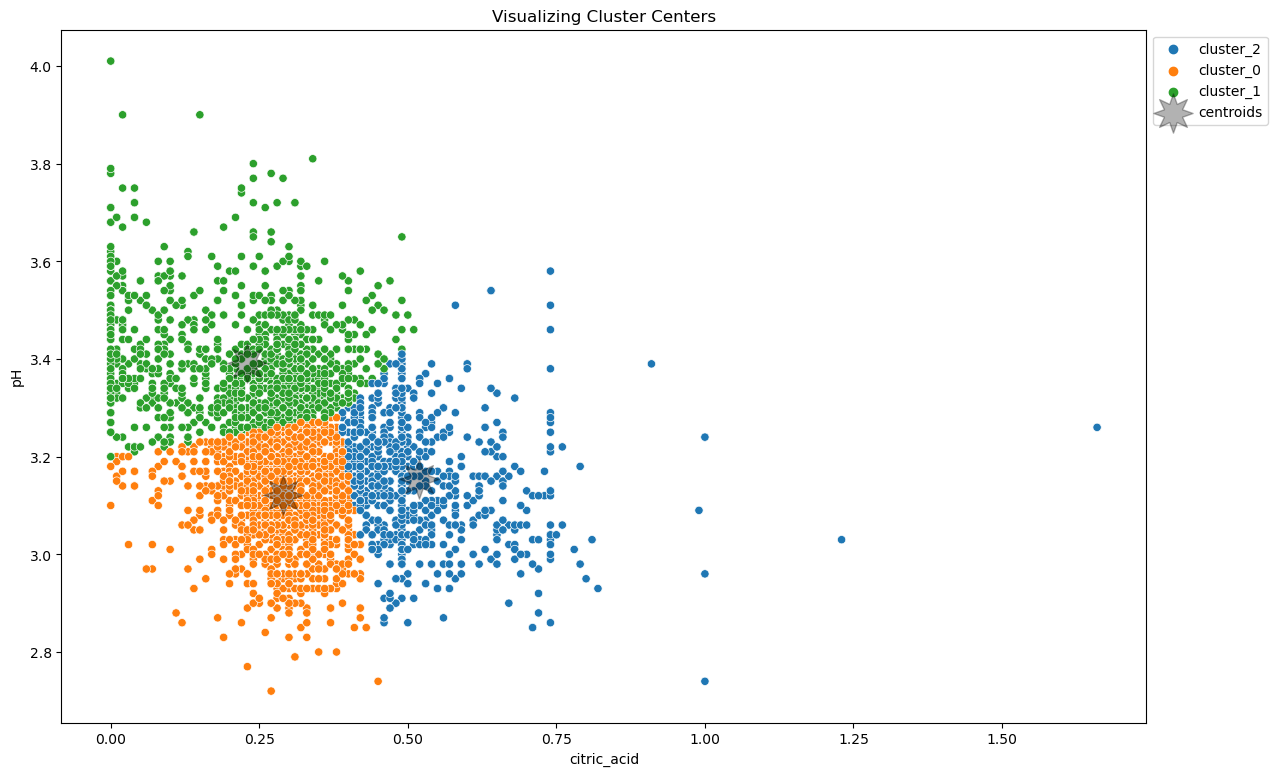

In [50]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))


# scatter plot of data with hue for cluster
sns.scatterplot(x = 'citric_acid', y = 'pH', data = train, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'citric_acid', y = 'pH', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids')

plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = train['cluster'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

<h4><b>Elbow method to choose K

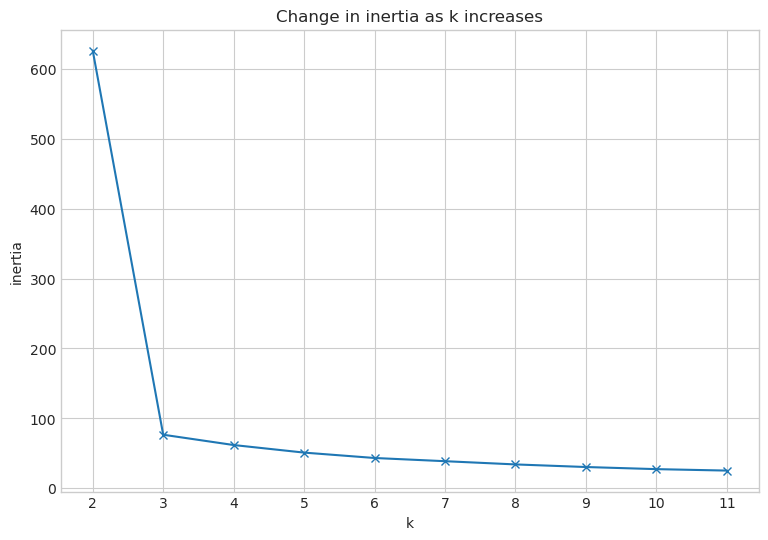

In [51]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

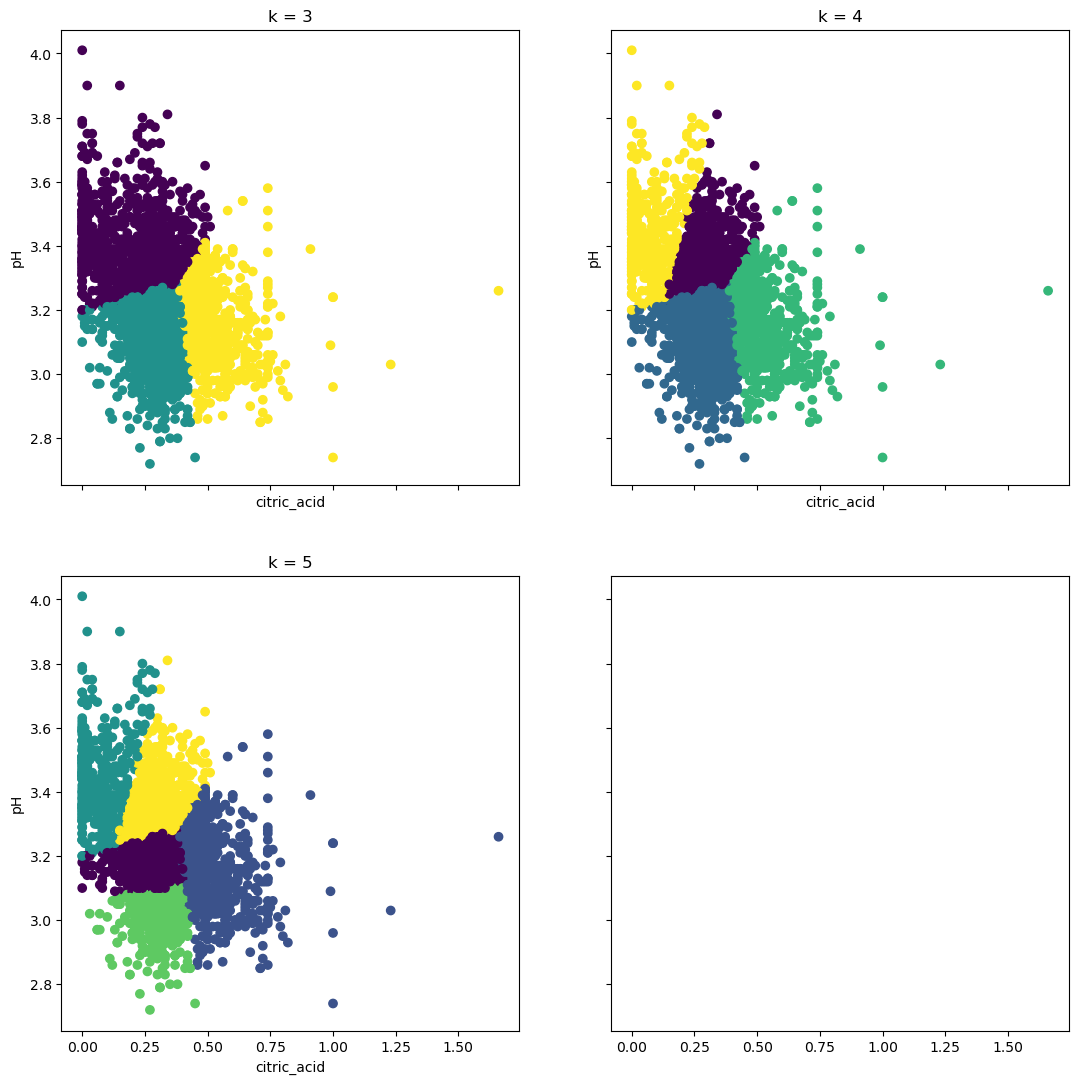

In [52]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 6)):
    
    clusters = KMeans(k).fit(X).predict(X)
    
    ax.scatter(X.citric_acid, X.pH, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='citric_acid', ylabel='pH')

<h4><b>Let's look at 'sulphates' and 'free sulfur dioxide'

In [53]:
X2 = train[['sulphates', 'free_sulfur_dioxide']]

# MAKE the thing
kmeans2 = KMeans(n_clusters=3)

# FIT the thing
kmeans2.fit(X2)

# USE (predict using) the thing 
kmeans2.predict(X2)

array([1, 2, 2, ..., 2, 0, 2], dtype=int32)

> <b>Add Clusters to original train data:

In [54]:
# make a new column names cluster in wines and X dataframe

train['cluster2'] = kmeans2.predict(X2)

X2['cluster2'] = kmeans2.predict(X2)

train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color,cluster,cluster2
3737,7.1,0.21,0.72,1.6,0.167,65.0,120.0,0.99324,2.97,0.51,9.2,5,White Wine,cluster_2,1
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5,White Wine,cluster_0,2
2200,6.4,0.24,0.23,7.3,0.069,31.0,157.0,0.99620,3.25,0.53,9.1,5,White Wine,cluster_0,2
4139,6.8,0.18,0.35,5.4,0.054,53.0,143.0,0.99287,3.10,0.54,11.0,7,White Wine,cluster_0,1
501,6.8,0.19,0.58,14.2,0.038,51.0,164.0,0.99750,3.12,0.48,9.6,6,White Wine,cluster_2,1


In [55]:
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans2.cluster_centers_

array([[ 0.57421541, 13.76212553],
       [ 0.49576869, 57.35049365],
       [ 0.51104194, 33.5612713 ]])

In [56]:
# Make a dataframe 

centroids2 = pd.DataFrame(kmeans2.cluster_centers_, columns = X2.columns[:2])
centroids2

,sulphates,free_sulfur_dioxide
0,0.574215,13.762126
1,0.495769,57.350494
2,0.511042,33.561271


In [57]:
#  Find the mean of the original df and groupby cluster

train.groupby('cluster2')['sulphates', 'free_sulfur_dioxide'].mean()

,sulphates,free_sulfur_dioxide
cluster2,,
0,0.574215,13.762126
1,0.495769,57.350494
2,0.511042,33.561271


In [58]:
# Labels (same as from predict) for each observation

kmeans.labels_

array([2, 0, 0, ..., 1, 0, 1], dtype=int32)

In [59]:
train['cluster2'] = 'cluster_' + train.cluster2.astype(str)
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color,cluster,cluster2
3737,7.1,0.21,0.72,1.6,0.167,65.0,120.0,0.99324,2.97,0.51,9.2,5,White Wine,cluster_2,cluster_1
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5,White Wine,cluster_0,cluster_2
2200,6.4,0.24,0.23,7.3,0.069,31.0,157.0,0.99620,3.25,0.53,9.1,5,White Wine,cluster_0,cluster_2
4139,6.8,0.18,0.35,5.4,0.054,53.0,143.0,0.99287,3.10,0.54,11.0,7,White Wine,cluster_0,cluster_1
501,6.8,0.19,0.58,14.2,0.038,51.0,164.0,0.99750,3.12,0.48,9.6,6,White Wine,cluster_2,cluster_1


NameError: name 'cluster2' is not defined

<Figure size 1400x900 with 0 Axes>

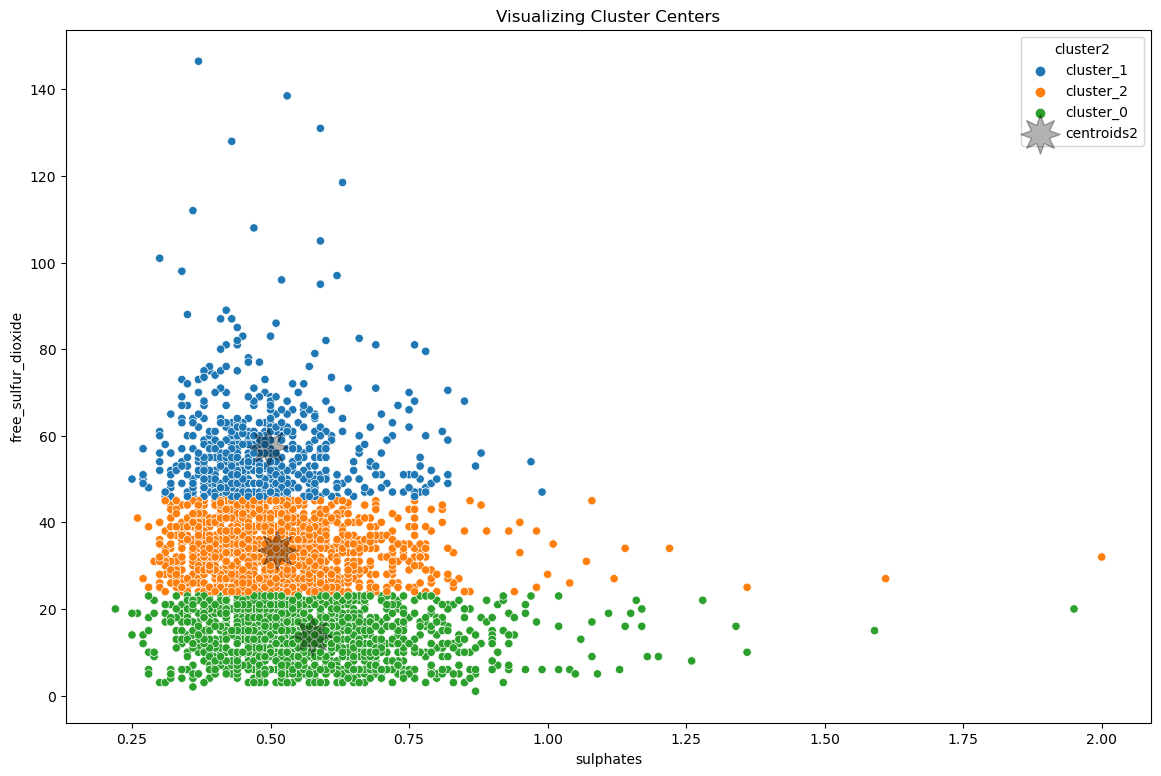

In [60]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))


# scatter plot of data with hue for cluster
sns.scatterplot(x = 'sulphates', y = 'free_sulfur_dioxide', data = train, hue = 'cluster2')


# plot cluster centers (centroids)
centroids2.plot.scatter(x = 'sulphates', y = 'free_sulfur_dioxide', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids2')


plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = train['cluster2'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster2 {cluster2}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

<h4><b>Elbow method to choose K

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X2).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 6)):
    
    clusters = KMeans(k).fit(X2).predict(X2)
    
    ax.scatter(X2.sulphates, X2.free_sulfur_dioxide, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='sulphates', ylabel='free_sulfur_dioxide')

<h4><b>Let's look at 'free_sulfur_dioxide' & 'alcohol'

In [ ]:
X3 = train[['free_sulfur_dioxide', 'alcohol']]

# MAKE the thing
kmeans3 = KMeans(n_clusters=3)

# FIT the thing
kmeans3.fit(X3)

# USE (predict using) the thing 
kmeans3.predict(X3)

> <b>Add Clusters to original train data:

In [ ]:
# make a new column names cluster in wines and X dataframe

train['cluster3'] = kmeans3.predict(X3)

X3['cluster3'] = kmeans3.predict(X3)

train.head()

In [ ]:
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans3.cluster_centers_

In [ ]:
# Make a dataframe 

centroids3 = pd.DataFrame(kmeans.cluster_centers_, columns = X3.columns[:2])
centroids3

In [ ]:
#  Find the mean of the original df and groupby cluster

train.groupby('cluster3')['free_sulfur_dioxide', 'alcohol'].mean()

In [ ]:
# Labels (same as from predict) for each observation

kmeans3.labels_

In [ ]:
train['cluster3'] = 'cluster3_' + train.cluster3.astype(str)
train.head()

In [ ]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))


# scatter plot of data with hue for cluster
sns.scatterplot(x = 'free_sulfur_dioxide', y = 'alcohol', data = train, hue = 'cluster3')


# plot cluster centers (centroids)
centroids3.plot.scatter(x = 'free_sulfur_dioxide', y = 'alcohol', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids3')

plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = train['cluster3'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster3 {cluster}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

<h4><b>Elbow method to choose K

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X3).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(4, 6)):
    
    clusters = KMeans(k).fit(X3).predict(X3)
    
    ax.scatter(X3.free_sulfur_dioxide, X3.alcohol, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='free_sulfur_dioxide', ylabel='alcohol')

<h2><b>Scale the Data

In [ ]:
#Need to encode Wine_Color column

In [ ]:

## Scale age, income, and spending score features
## make the thing
#scaler = MinMaxScaler()
#
## fit the thing on train
#scaler.fit(train)
#
## use the thing (scale train, validate, and test)
#train_scaled = scaler.transform(train)
#
## If we had the validate and test sets
## validate_scaled = scaler.transform(validate) 
## test_scaled = scaler.transform(test) if we had validate
#
## turn the scaled arrays into dataframes
#train_scaled = pd.DataFrame(train_scaled, columns=train.columns, index=train.index)
#
## If we had the validate and test 
## validate_scaled = pd.DataFrame(train_scaled, columns=validate.columns) 
## test_scaled = pd.DataFrame(train_scaled, columns=test.columns)
#train_scaled.head()

<h2><b>Real Modeling - What kind of Model to Run?